In [1]:
import os
import numpy as np
from numpy import linalg as LA
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from torchvision import models

In [2]:
# Load data function
def load_train_img(f):
    f=open(f)
    lines=f.readlines()
    print('Total train images:', len(lines))
    imgs, lab=[], []
    for i in tqdm(range(len(lines)), desc="Loading images"):
        fn, label = lines[i].split(' ')
        im1 = cv2.imread('images/' + fn)
        im1 = cv2.resize(im1, (128, 128))
        im1_tensor = torch.from_numpy(im1.transpose(2, 0, 1)) # Convert to torch_tensor
        
        imgs.append(im1_tensor)
        lab.append(int(label))
        
    img_tensor = torch.stack(imgs)
    lab_tensor = torch.tensor(lab)
    
    return img_tensor, lab_tensor

def load_val_img(f):
    f=open(f)
    lines=f.readlines()
    print('Total validation images:', len(lines))
    imgs, lab=[], []
    for i in tqdm(range(len(lines)), desc="Loading images"):
        fn, label = lines[i].split(' ')
        im1 = cv2.imread('images/' + fn)
        im1 = cv2.resize(im1, (128, 128))
        im1_tensor = torch.from_numpy(im1.transpose(2, 0, 1)) # Convert to torch_tensor
        
        imgs.append(im1_tensor)
        lab.append(int(label))
        
    img_tensor = torch.stack(imgs)
    lab_tensor = torch.tensor(lab)
    
    return img_tensor, lab_tensor

def load_test_img(f):
    f=open(f)
    lines=f.readlines()
    print('Total test images:', len(lines))
    imgs, lab=[], []
    for i in tqdm(range(len(lines)), desc="Loading images"):
        fn, label = lines[i].split(' ')
        im1 = cv2.imread('images/' + fn)
        im1 = cv2.resize(im1, (128, 128))
        im1_tensor = torch.from_numpy(im1.transpose(2, 0, 1)) # Convert to torch_tensor
        
        imgs.append(im1_tensor)
        lab.append(int(label))
        
    img_tensor = torch.stack(imgs)
    lab_tensor = torch.tensor(lab)
    
    return img_tensor, lab_tensor

In [3]:
# Load data
x, y =  load_train_img('images/train.txt')
vx, vy =  load_val_img('images/val.txt')
tx, ty =  load_test_img('images/test.txt')

Total train images: 63325


Loading images: 100%|███████████████████████████████████████████████████████████| 63325/63325 [06:15<00:00, 168.84it/s]


Total validation images: 450


Loading images: 100%|███████████████████████████████████████████████████████████████| 450/450 [00:02<00:00, 214.50it/s]


Total test images: 450


Loading images: 100%|███████████████████████████████████████████████████████████████| 450/450 [00:02<00:00, 211.03it/s]


In [4]:
# dataloader
y_tensor = torch.nn.functional.one_hot(y, num_classes=50)
vy_tensor = torch.nn.functional.one_hot(vy, num_classes=50)
ty_tensor = torch.nn.functional.one_hot(ty, num_classes=50)

dataset = TensorDataset(x, y_tensor)
vdataset = TensorDataset(vx, vy_tensor)
tdataset = TensorDataset(tx, ty_tensor)

bs = 128
loader = DataLoader(dataset, batch_size = bs, shuffle = True)
vloader = DataLoader(vdataset, batch_size = bs, shuffle = True)
tloader = DataLoader(tdataset, batch_size = bs, shuffle = True)

# ResNet34 (Baseline model)

In [9]:
# Build ResNet34
model_resnet34 = models.resnet34(pretrained=False)
num_classes = 50
model_resnet34.fc = nn.Linear(model_resnet34.fc.in_features, num_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_resnet34.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 19.32it/s]


Epoch 1/10, Training Loss: 3.1307, Training Accuracy: 16.14%, Validation Loss: 3.5826, Validation Accuracy: 13.78%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.00it/s]


Epoch 2/10, Training Loss: 2.5578, Training Accuracy: 27.64%, Validation Loss: 2.4025, Validation Accuracy: 29.33%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 19.91it/s]


Epoch 3/10, Training Loss: 2.1670, Training Accuracy: 36.83%, Validation Loss: 2.4268, Validation Accuracy: 32.89%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 21.32it/s]


Epoch 4/10, Training Loss: 1.8629, Training Accuracy: 44.43%, Validation Loss: 2.1218, Validation Accuracy: 40.22%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.42it/s]


Epoch 5/10, Training Loss: 1.6084, Training Accuracy: 51.07%, Validation Loss: 2.1317, Validation Accuracy: 39.78%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.62it/s]


Epoch 6/10, Training Loss: 1.3841, Training Accuracy: 56.97%, Validation Loss: 2.2948, Validation Accuracy: 39.33%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 19.87it/s]


Epoch 7/10, Training Loss: 1.1688, Training Accuracy: 62.97%, Validation Loss: 2.0201, Validation Accuracy: 45.33%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 21.05it/s]


Epoch 8/10, Training Loss: 0.9516, Training Accuracy: 69.12%, Validation Loss: 1.6723, Validation Accuracy: 53.33%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.00it/s]


Epoch 9/10, Training Loss: 0.7511, Training Accuracy: 75.01%, Validation Loss: 2.8301, Validation Accuracy: 42.67%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.58it/s]


Epoch 10/10, Training Loss: 0.5568, Training Accuracy: 81.12%, Validation Loss: 2.0528, Validation Accuracy: 50.00%


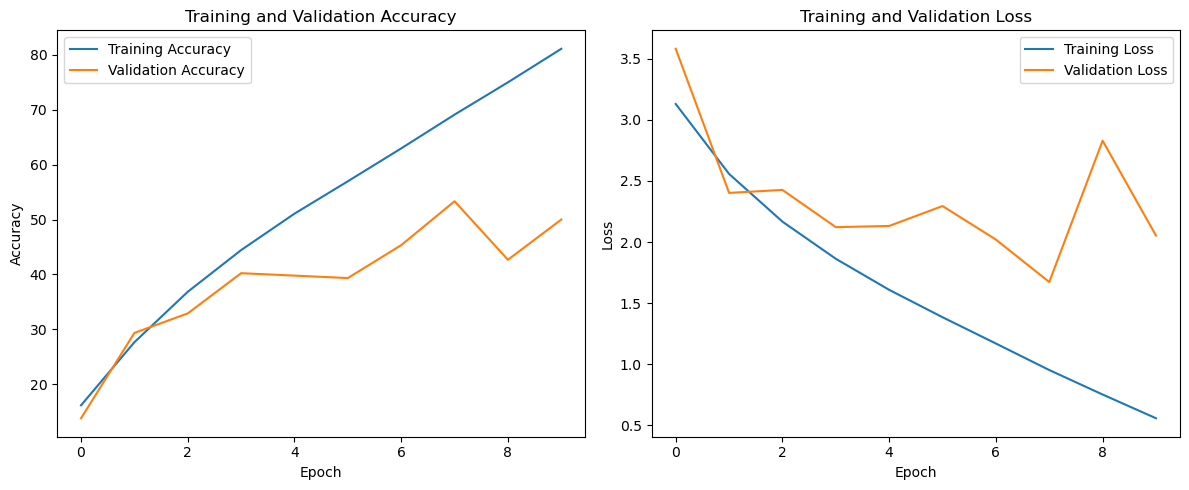

In [10]:
# ResNet34-train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet34.parameters(), lr=0.001)
epochs = 10

training_acc = []
val_acc = []
training_loss = []
val_loss = []

for epoch in range(epochs):
    model_resnet34.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(loader, desc=f"Epoch {epoch + 1}/{epochs}"):
        inputs, labels = inputs.float().to(device), labels.float().to(device)
        outputs = model_resnet34(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        labels = labels.argmax(dim=1)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        train_total += labels.size(0)

    training_acc.append(100 * train_correct / train_total)
    training_loss.append(running_loss / len(loader.dataset))

    model_resnet34.eval()
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in tqdm(vloader, desc="Evaluating"):
            inputs, labels = inputs.float().to(device), labels.float().to(device)
            labels = labels.argmax(dim=1)
            outputs = model_resnet34(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc.append(100 * correct / total)
    val_loss.append(val_running_loss / len(vloader.dataset))

    print(f"Epoch {epoch + 1}/{epochs}, "
          f"Training Loss: {training_loss[-1]:.4f}, "
          f"Training Accuracy: {training_acc[-1]:.2f}%, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]:.2f}%")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [11]:
# ResNet34 test accuracy
model_resnet34.eval() 
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in tqdm(tloader, desc="Evaluating"):
        inputs, labels = inputs.float().to(device), labels.float().to(device)
        labels = labels.argmax(dim=1)
        outputs = model_resnet34(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)      
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"test Accuracy: {accuracy:.4f}%")

Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.69it/s]

test Accuracy: 49.5556%


# Design a (2-4)-layer CNN (self-attention mechanisms)

In [12]:
# Build self-made CNN model (use CondConv)
class Attention(nn.Module):
    def __init__(self,in_planes,K,init_weight=True):
        super().__init__()
        self.avgpool=nn.AdaptiveAvgPool2d(1)
        self.net=nn.Conv2d(in_planes,K,kernel_size=1,bias=False)
        self.sigmoid=nn.Sigmoid()

        if(init_weight):
            self._initialize_weights()


    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            if isinstance(m ,nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self,x):
        att=self.avgpool(x) #bs,dim,1,1
        att=self.net(att).view(x.shape[0],-1) #bs,K
        return self.sigmoid(att)

class CondConv(nn.Module):
    def __init__(self,in_planes,out_planes,kernel_size,stride,padding=0,dilation=1,grounps=1,bias=True,K=4,init_weight=True):
        super().__init__()
        self.in_planes=in_planes
        self.out_planes=out_planes
        self.kernel_size=kernel_size
        self.stride=stride
        self.padding=padding
        self.dilation=dilation
        self.groups=grounps
        self.bias=bias
        self.K=K
        self.init_weight=init_weight
        self.attention=Attention(in_planes=in_planes,K=K,init_weight=init_weight)

        self.weight=nn.Parameter(torch.randn(K,out_planes,in_planes//grounps,kernel_size,kernel_size),requires_grad=True)
        if(bias):
            self.bias=nn.Parameter(torch.randn(K,out_planes),requires_grad=True)
        else:
            self.bias=None
        
        if(self.init_weight):
            self._initialize_weights()

        #TODO 初始化
    def _initialize_weights(self):
        for i in range(self.K):
            nn.init.kaiming_uniform_(self.weight[i])

    def forward(self,x):
        bs,in_planels,h,w=x.shape
        softmax_att=self.attention(x) #bs,K
        x=x.view(1,-1,h,w)
        weight=self.weight.view(self.K,-1) #K,-1
        aggregate_weight=torch.mm(softmax_att,weight).view(bs*self.out_planes,self.in_planes//self.groups,self.kernel_size,self.kernel_size) #bs*out_p,in_p,k,k

        if(self.bias is not None):
            bias=self.bias.view(self.K,-1) #K,out_p
            aggregate_bias=torch.mm(softmax_att,bias).view(-1) #bs,out_p
            output=F.conv2d(x,weight=aggregate_weight,bias=aggregate_bias,stride=self.stride,padding=self.padding,groups=self.groups*bs,dilation=self.dilation)
        else:
            output=F.conv2d(x,weight=aggregate_weight,bias=None,stride=self.stride,padding=self.padding,groups=self.groups*bs,dilation=self.dilation)
        
        output=output.view(bs,self.out_planes,h,w)
        return output

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=50):
        super(SimpleCNN, self).__init__()
        self.conv1 = CondConv(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = CondConv(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 8 * 8, 1024)
        self.fc2 = nn.Linear(1024, 50) 

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_simplecnn = SimpleCNN()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_simplecnn.to(device)

SimpleCNN(
  (conv1): CondConv(
    (attention): Attention(
      (avgpool): AdaptiveAvgPool2d(output_size=1)
      (net): Conv2d(3, 4, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (sigmoid): Sigmoid()
    )
  )
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): CondConv(
    (attention): Attention(
      (avgpool): AdaptiveAvgPool2d(output_size=1)
      (net): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (sigmoid): Sigmoid()
    )
  )
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, 

Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 30.42it/s]


Epoch 1/10, Training Loss: 3.3622, Training Accuracy: 14.89%, Validation Loss: 3.0959, Validation Accuracy: 15.78%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 30.77it/s]


Epoch 2/10, Training Loss: 2.6438, Training Accuracy: 25.93%, Validation Loss: 2.6471, Validation Accuracy: 26.00%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 30.53it/s]


Epoch 3/10, Training Loss: 2.3612, Training Accuracy: 32.61%, Validation Loss: 2.5700, Validation Accuracy: 27.33%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 30.42it/s]


Epoch 4/10, Training Loss: 2.1482, Training Accuracy: 37.74%, Validation Loss: 2.5925, Validation Accuracy: 28.44%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 31.20it/s]


Epoch 5/10, Training Loss: 1.9479, Training Accuracy: 42.77%, Validation Loss: 2.2993, Validation Accuracy: 37.33%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 30.84it/s]


Epoch 6/10, Training Loss: 1.7630, Training Accuracy: 47.57%, Validation Loss: 2.1417, Validation Accuracy: 39.11%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 30.93it/s]


Epoch 7/10, Training Loss: 1.5961, Training Accuracy: 51.85%, Validation Loss: 1.9091, Validation Accuracy: 45.78%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 31.25it/s]


Epoch 8/10, Training Loss: 1.4185, Training Accuracy: 56.78%, Validation Loss: 2.0465, Validation Accuracy: 45.56%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 31.22it/s]


Epoch 9/10, Training Loss: 1.2472, Training Accuracy: 61.33%, Validation Loss: 2.1509, Validation Accuracy: 43.11%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 31.37it/s]


Epoch 10/10, Training Loss: 1.0673, Training Accuracy: 66.56%, Validation Loss: 1.9779, Validation Accuracy: 48.22%


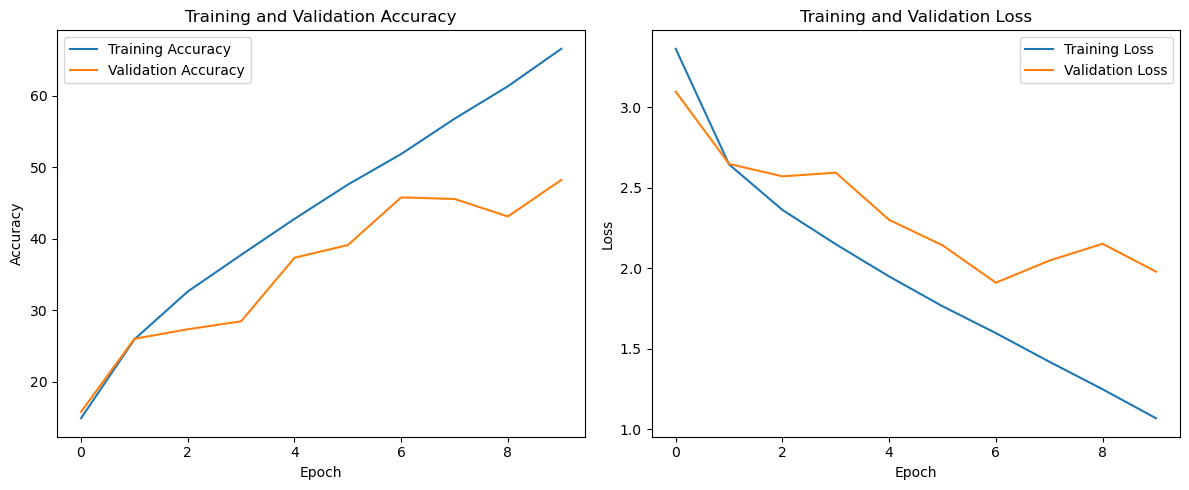

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_simplecnn.parameters(), lr=0.001)
epochs = 10

training_acc = []
val_acc = []
training_loss = []
val_loss = []

for epoch in range(epochs):
    model_simplecnn.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(loader, desc=f"Epoch {epoch + 1}/{epochs}"):
        inputs, labels = inputs.float().to(device), labels.float().to(device)
        outputs = model_simplecnn(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        labels = labels.argmax(dim=1)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        train_total += labels.size(0)

    training_acc.append(100 * train_correct / train_total)
    training_loss.append(running_loss / len(loader.dataset))

    model_simplecnn.eval()
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in tqdm(vloader, desc="Evaluating"):
            inputs, labels = inputs.float().to(device), labels.float().to(device)
            labels = labels.argmax(dim=1)
            outputs = model_simplecnn(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc.append(100 * correct / total)
    val_loss.append(val_running_loss / len(vloader.dataset))

    print(f"Epoch {epoch + 1}/{epochs}, "
          f"Training Loss: {training_loss[-1]:.4f}, "
          f"Training Accuracy: {training_acc[-1]:.2f}%, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]:.2f}%")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [14]:
# self-made CNN test accuracy
model_simplecnn.eval() 
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in tqdm(tloader, desc="Evaluating"):
        inputs, labels = inputs.float().to(device), labels.float().to(device)
        labels = labels.argmax(dim=1)
        outputs = model_simplecnn(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)      
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"test Accuracy: {accuracy:.4f}%")

Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.11it/s]

test Accuracy: 45.7778%


# Design a (2-4)-layer CNN (normal Conv2d)

In [15]:
# Build self-made CNN model (use normal conv)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=50):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 8 * 8, 1024)
        self.fc2 = nn.Linear(1024, 50) 

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_simplecnn = SimpleCNN()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_simplecnn.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16384, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=50, bias=True)
)

Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 35.55it/s]


Epoch 1/10, Training Loss: 3.4025, Training Accuracy: 14.02%, Validation Loss: 3.8321, Validation Accuracy: 9.56%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 37.21it/s]


Epoch 2/10, Training Loss: 2.6515, Training Accuracy: 25.95%, Validation Loss: 2.6663, Validation Accuracy: 20.44%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 36.20it/s]


Epoch 3/10, Training Loss: 2.3547, Training Accuracy: 32.84%, Validation Loss: 2.4608, Validation Accuracy: 26.67%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 36.52it/s]


Epoch 4/10, Training Loss: 2.1129, Training Accuracy: 38.55%, Validation Loss: 2.2892, Validation Accuracy: 32.00%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 37.55it/s]


Epoch 5/10, Training Loss: 1.9172, Training Accuracy: 43.48%, Validation Loss: 2.1895, Validation Accuracy: 35.11%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 37.91it/s]


Epoch 6/10, Training Loss: 1.7383, Training Accuracy: 48.17%, Validation Loss: 2.1368, Validation Accuracy: 40.22%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 36.91it/s]


Epoch 7/10, Training Loss: 1.5671, Training Accuracy: 52.72%, Validation Loss: 2.0473, Validation Accuracy: 36.67%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 38.45it/s]


Epoch 8/10, Training Loss: 1.3964, Training Accuracy: 57.13%, Validation Loss: 2.1213, Validation Accuracy: 38.89%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 37.77it/s]


Epoch 9/10, Training Loss: 1.2411, Training Accuracy: 61.34%, Validation Loss: 2.3533, Validation Accuracy: 40.00%


Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 38.23it/s]


Epoch 10/10, Training Loss: 1.0836, Training Accuracy: 65.87%, Validation Loss: 2.0859, Validation Accuracy: 45.78%


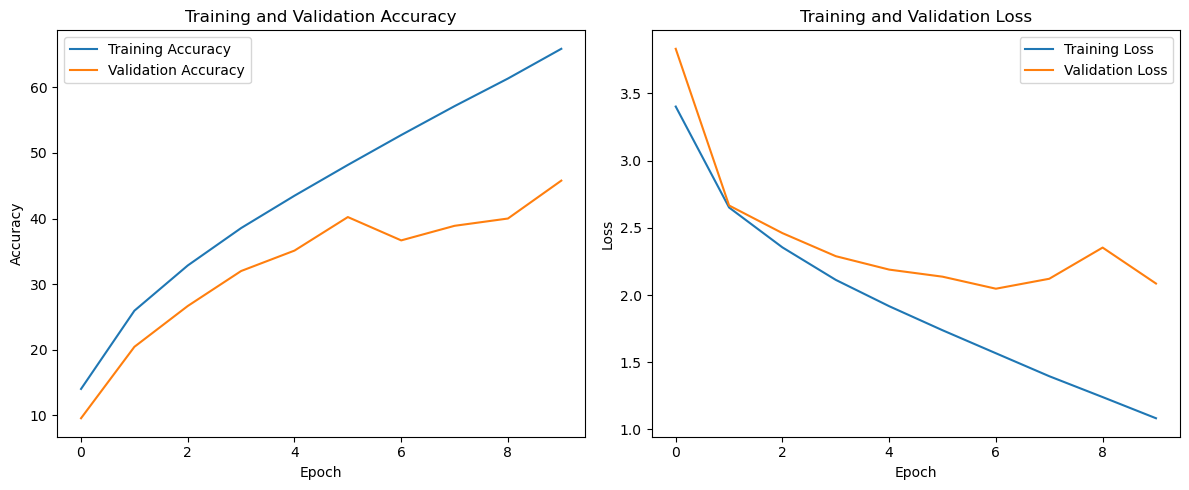

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_simplecnn.parameters(), lr=0.001)
epochs = 10

training_acc = []
val_acc = []
training_loss = []
val_loss = []

for epoch in range(epochs):
    model_simplecnn.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(loader, desc=f"Epoch {epoch + 1}/{epochs}"):
        inputs, labels = inputs.float().to(device), labels.float().to(device)
        outputs = model_simplecnn(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        labels = labels.argmax(dim=1)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        train_total += labels.size(0)

    training_acc.append(100 * train_correct / train_total)
    training_loss.append(running_loss / len(loader.dataset))

    model_simplecnn.eval()
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in tqdm(vloader, desc="Evaluating"):
            inputs, labels = inputs.float().to(device), labels.float().to(device)
            labels = labels.argmax(dim=1)
            outputs = model_simplecnn(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc.append(100 * correct / total)
    val_loss.append(val_running_loss / len(vloader.dataset))

    print(f"Epoch {epoch + 1}/{epochs}, "
          f"Training Loss: {training_loss[-1]:.4f}, "
          f"Training Accuracy: {training_acc[-1]:.2f}%, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]:.2f}%")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [17]:
# self-made CNN test accuracy
model_simplecnn.eval() 
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in tqdm(tloader, desc="Evaluating"):
        inputs, labels = inputs.float().to(device), labels.float().to(device)
        labels = labels.argmax(dim=1)
        outputs = model_simplecnn(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)      
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"test Accuracy: {accuracy:.4f}%")

Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.14it/s]

test Accuracy: 40.0000%
